In [61]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5611a565-2241-4ec5-980f-dc507368da3a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#I had to go in and put the "jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10"
#into Anaconda Prompt to change this to allow pull data
  

{'status': {'timestamp': '2022-06-23T03:44:32.077Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9930}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9580, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [76]:
type(data)

dict

In [77]:
import pandas as pd

pd.set_option('display.max_columns', None) #this function will let me see every columns
pd.set_option('display.max_rows', None)

In [127]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9580,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19074531.00000,19074531.00000,NaN,1,NaN,NaN,None,2022-06-23T03:40:00.000Z,20304.46451,29505091478.57671,1.18120,-0.47856,-0.80529,-9.07102,-30.62457,-48.98117,-53.81742,387298137819.99182,43.14300,426393754804.23999,None,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 14:17:40.863553
1,1027,Ethereum,ETH,ethereum,5768,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121271038.62400,121271038.62400,NaN,2,NaN,NaN,None,2022-06-23T03:40:00.000Z,1079.29708,15446722427.46743,1.38430,-0.59955,-2.17243,-10.95729,-45.68973,-63.48938,-65.47426,130887478377.17310,14.58020,130887478377.17000,None,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 14:17:40.863553
2,825,Tether,USDT,tether,35023,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66979725012.15723,68610622657.48347,NaN,3,NaN,NaN,None,2022-06-23T03:40:00.000Z,0.99906,47337031736.22440,-5.65250,0.00105,0.00721,0.00808,0.01299,-0.11813,-0.14950,66916501344.70459,7.45800,68545859549.10000,None,2022-06-23T03:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-23 14:17:40.863553
3,3408,USD Coin,USDC,usd-coin,4583,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55861836511.44879,55861836511.44879,NaN,4,NaN,NaN,None,2022-06-23T03:39:00.000Z,1.00020,4721306525.06771,-1.51220,0.01430,0.00395,0.00582,0.02261,0.02029,0.05164,55872856436.20381,6.22390,55872856436.20000,None,2022-06-23T03:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-23 14:17:40.863553
4,1839,BNB,BNB,bnb,975,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,None,2022-06-23T03:39:00.000Z,218.30998,1054290124.43778,-9.12010,-0.11720,0.65123,-5.40604,-33.06786,-46.13812,-47.18888,35644992973.77274,3.97230,36046636480.06000,None,2022-06-23T03:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 14:17:40.863553
5,4687,Binance USD,BUSD,binance-usd,3876,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17529493240.30925,17529493240.30925,NaN,6,NaN,NaN,None,2022-06-23T03:40:00.000Z,0.99906,4601268049.33489,-7.44610,-0.23723,-0.19780,-0.10907,-0.18450,-0.15259,-0.13181,17513050723.26197,1.95160,17513050723.26000,None,2022-06-23T03:40:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-06-23 14:17:40.863553
6,2010,Cardano,ADA,cardano,463,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,NaN,7,NaN,NaN,None,2022-06-23T03:39:00.000Z,0.46835,811472537.98555,-19.72110,-0.30902,0.11413,-10.22635,-9.96801,-47.64342,-58.76213,15801764241.85737,1.76110,21075870354.46000,None,2022-06-23T03:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 14:17:40.863553
7,52,XRP,XRP,xrp,743,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,8,NaN,NaN,None,2022-06-23T03:40:00.000Z,0.32309,1035678294.43492,-18.61200,-0.43872,0.01638,-3.98633,-21.39770,-54.53135,-61.52166,15619077894.92873,1.73990,32308804168.93000,None,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,Na

In [87]:

def api_runner():

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5611a565-2241-4ec5-980f-dc507368da3a',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
#I had to go in and put the "jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10"
#into Anaconda Prompt to change this to allow pull data
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.Timestamp('now')
    data = [df, df2]
    df2 = pd.concat(data)
    df
    
    if not os.path.isfile(r'/Users/afnimaratuljannahbasiru/Desktop/projects/API.csv'):
        df.to_csv(r'/Users/afnimaratuljannahbasiru/Desktop/projects/API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/afnimaratuljannahbasiru/Desktop/projects/API.csv', mode = 'a', header = False)
   

In [123]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #wait for 60 seconds (sleep for 1 minute) and gonna run again
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [89]:
df3 = pd.read_csv(r'/Users/afnimaratuljannahbasiru/Desktop/projects/API.csv')
df3 

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9580,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.907453e+07,1.907453e+07,NaN,1,NaN,NaN,NaN,2022-06-23T03:40:00.000Z,20304.464514,2.950509e+10,1.1812,-0.478563,-0.805288,-9.071019,-30.624566,-48.981167,-53.817425,3.872981e+11,43.1430,4.263938e+11,NaN,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:03:12.435902
1,1,1027,Ethereum,ETH,ethereum,5768,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.212710e+08,1.212710e+08,NaN,2,NaN,NaN,NaN,2022-06-23T03:40:00.000Z,1079.297084,1.544672e+10,1.3843,-0.599546,-2.172429,-10.957293,-45.689733,-63.489376,-65.474260,1.308875e+11,14.5802,1.308875e+11,NaN,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:03:12.435902
2,2,825,Tether,USDT,tether,35023,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.697973e+10,6.861062e+10,NaN,3,NaN,NaN,NaN,2022-06-23T03:40:00.000Z,0.999056,4.733703e+10,-5.6525,0.001050,0.007210,0.008083,0.012985,-0.118132,-0.149504,6.691650e+10,7.4580,6.854586e+10,NaN,2022-06-23T03:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-23 13:03:12.435902
3,3,3408,USD Coin,USDC,usd-coin,4583,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.586184e+10,5.586184e+10,NaN,4,NaN,NaN,NaN,2022-06-23T03:39:00.000Z,1.000197,4.721307e+09,-1.5122,0.014295,0.003955,0.005824,0.022614,0.020293,0.051642,5.587286e+10,6.2239,5.587286e+10,NaN,2022-06-23T03:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-23 13:03:12.435902
4,4,1839,BNB,BNB,bnb,975,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,NaN,2022-06-23T03:39:00.000Z,218.309979,1.054290e+09,-9.1201,-0.117195,0.651229,-5.406039,-33.067865,-46.138122,-47.188878,3.564499e+10,3.9723,3.604664e+10,NaN,2022-06-23T03:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:03:12.435902
5,5,4687,Binance USD,BUSD,binance-usd,3876,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.752949e+10,1.752949e+10,NaN,6,NaN,NaN,NaN,2022-06-23T03:40:00.000Z,0.999062,4.601268e+09,-7.4461,-0.237230,-0.197795,-0.109072,-0.184497,-0.152595,-0.131813,1.751305e+10,1.9516,1.751305e+10,NaN,2022-06-23T03:40:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-23 13:03:12.435902
6,6,2010,Cardano,ADA,cardano,463,2017-10-01T00:00:00.000Z,"['mineable', 'dpos', 'pos', 'platform', 'resea...",4.500000e+10,3.373903e+10,3.427770e+10,NaN,7,NaN,NaN,NaN,2022-06-23T03:39:00.000Z,0.468353,8.114725e+08,-19.7211,-0.309017,0.114129,-10.226346,-9.968008,-47.643420,-58.762127,1.580176e+10,1.7611,2.107587e+10,NaN,2022-06-23T03:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:03:12.435902
7,7,52,XRP,XRP,xrp,743,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,NaN,2022-06-23T03:40:00.000Z,0.323088,1.035678e+09,-18.6120,-0.438722,0.016380,-3.986325,-21.397698,-54.531350,-61.521659,1.561908e+10,1.7399,3.230880e+10,NaN,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:03:12.435902
8,8,5426,Solana,SOL,solana,336,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,3.425080e+08,5.1

In [90]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9580,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.907453e+07,1.907453e+07,NaN,1,NaN,NaN,None,2022-06-23T03:40:00.000Z,20304.464514,2.950509e+10,1.1812,-0.478563,-0.805288,-9.071019,-30.624566,-48.981167,-53.817425,3.872981e+11,43.1430,4.263938e+11,None,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:03:12.435902
1,1027,Ethereum,ETH,ethereum,5768,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.212710e+08,1.212710e+08,NaN,2,NaN,NaN,None,2022-06-23T03:40:00.000Z,1079.297084,1.544672e+10,1.3843,-0.599546,-2.172429,-10.957293,-45.689733,-63.489376,-65.474260,1.308875e+11,14.5802,1.308875e+11,None,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:03:12.435902
2,825,Tether,USDT,tether,35023,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.697973e+10,6.861062e+10,NaN,3,NaN,NaN,None,2022-06-23T03:40:00.000Z,0.999056,4.733703e+10,-5.6525,0.001050,0.007210,0.008083,0.012985,-0.118132,-0.149504,6.691650e+10,7.4580,6.854586e+10,None,2022-06-23T03:40:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-23 13:03:12.435902
3,3408,USD Coin,USDC,usd-coin,4583,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.586184e+10,5.586184e+10,NaN,4,NaN,NaN,None,2022-06-23T03:39:00.000Z,1.000197,4.721307e+09,-1.5122,0.014295,0.003955,0.005824,0.022614,0.020293,0.051642,5.587286e+10,6.2239,5.587286e+10,None,2022-06-23T03:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-23 13:03:12.435902
4,1839,BNB,BNB,bnb,975,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,None,2022-06-23T03:39:00.000Z,218.309979,1.054290e+09,-9.1201,-0.117195,0.651229,-5.406039,-33.067865,-46.138122,-47.188878,3.564499e+10,3.9723,3.604664e+10,None,2022-06-23T03:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:03:12.435902
5,4687,Binance USD,BUSD,binance-usd,3876,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.752949e+10,1.752949e+10,NaN,6,NaN,NaN,None,2022-06-23T03:40:00.000Z,0.999062,4.601268e+09,-7.4461,-0.237230,-0.197795,-0.109072,-0.184497,-0.152595,-0.131813,1.751305e+10,1.9516,1.751305e+10,None,2022-06-23T03:40:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-06-23 13:03:12.435902
6,2010,Cardano,ADA,cardano,463,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.373903e+10,3.427770e+10,NaN,7,NaN,NaN,None,2022-06-23T03:39:00.000Z,0.468353,8.114725e+08,-19.7211,-0.309017,0.114129,-10.226346,-9.968008,-47.643420,-58.762127,1.580176e+10,1.7611,2.107587e+10,None,2022-06-23T03:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:03:12.435902
7,52,XRP,XRP,xrp,743,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",1.000000e+11,4.834310e+10,9.998954e+10,NaN,8,NaN,NaN,None,2022-06-23T03:40:00.000Z,0.323088,1.035678e+09,-18.6120,-0.438722,0.016380,-3.986325,-21.397698,-54.531350,-61.521659,1.561908e+10,1.7399,3.230880e+10,None,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:03:12.435902
8,5426,Solana,SOL,solana,336,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.425080e+08,5.116169e+08,NaN

In [91]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [95]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9580,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19074531.00000,19074531.00000,NaN,1,NaN,NaN,None,2022-06-23T03:40:00.000Z,20304.46451,29505091478.57671,1.18120,-0.47856,-0.80529,-9.07102,-30.62457,-48.98117,-53.81742,387298137819.99182,43.14300,426393754804.23999,None,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:30:16.135981
1,1027,Ethereum,ETH,ethereum,5768,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121271038.62400,121271038.62400,NaN,2,NaN,NaN,None,2022-06-23T03:40:00.000Z,1079.29708,15446722427.46743,1.38430,-0.59955,-2.17243,-10.95729,-45.68973,-63.48938,-65.47426,130887478377.17310,14.58020,130887478377.17000,None,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:30:16.135981
2,825,Tether,USDT,tether,35023,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66979725012.15723,68610622657.48347,NaN,3,NaN,NaN,None,2022-06-23T03:40:00.000Z,0.99906,47337031736.22440,-5.65250,0.00105,0.00721,0.00808,0.01299,-0.11813,-0.14950,66916501344.70459,7.45800,68545859549.10000,None,2022-06-23T03:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-23 13:30:16.135981
3,3408,USD Coin,USDC,usd-coin,4583,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55861836511.44879,55861836511.44879,NaN,4,NaN,NaN,None,2022-06-23T03:39:00.000Z,1.00020,4721306525.06771,-1.51220,0.01430,0.00395,0.00582,0.02261,0.02029,0.05164,55872856436.20381,6.22390,55872856436.20000,None,2022-06-23T03:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-23 13:30:16.135981
4,1839,BNB,BNB,bnb,975,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,None,2022-06-23T03:39:00.000Z,218.30998,1054290124.43778,-9.12010,-0.11720,0.65123,-5.40604,-33.06786,-46.13812,-47.18888,35644992973.77274,3.97230,36046636480.06000,None,2022-06-23T03:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:30:16.135981
5,4687,Binance USD,BUSD,binance-usd,3876,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17529493240.30925,17529493240.30925,NaN,6,NaN,NaN,None,2022-06-23T03:40:00.000Z,0.99906,4601268049.33489,-7.44610,-0.23723,-0.19780,-0.10907,-0.18450,-0.15259,-0.13181,17513050723.26197,1.95160,17513050723.26000,None,2022-06-23T03:40:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-06-23 13:30:16.135981
6,2010,Cardano,ADA,cardano,463,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,NaN,7,NaN,NaN,None,2022-06-23T03:39:00.000Z,0.46835,811472537.98555,-19.72110,-0.30902,0.11413,-10.22635,-9.96801,-47.64342,-58.76213,15801764241.85737,1.76110,21075870354.46000,None,2022-06-23T03:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-23 13:30:16.135981
7,52,XRP,XRP,xrp,743,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,8,NaN,NaN,None,2022-06-23T03:40:00.000Z,0.32309,1035678294.43492,-18.61200,-0.43872,0.01638,-3.98633,-21.39770,-54.53135,-61.52166,15619077894.92873,1.73990,32308804168.93000,None,2022-06-23T03:40:00.000Z,NaN,NaN,NaN,Na

In [96]:
df4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.47856,-0.80529,-9.07102,-30.62457,-48.98117,-53.81742
Ethereum,-0.59955,-2.17243,-10.95729,-45.68973,-63.48938,-65.47426
Tether,0.00105,0.00721,0.00808,0.01299,-0.11813,-0.14950
USD Coin,0.01430,0.00395,0.00582,0.02261,0.02029,0.05164
BNB,-0.11720,0.65123,-5.40604,-33.06786,-46.13812,-47.18888
Binance USD,-0.23723,-0.19780,-0.10907,-0.18450,-0.15259,-0.13181
Cardano,-0.30902,0.11413,-10.22635,-9.96801,-47.64342,-58.76213
XRP,-0.43872,0.01638,-3.98633,-21.39770,-54.53135,-61.52166
Solana,-0.20100,-0.03970,2.90126,-29.38031,-65.28744,-66.00442


In [97]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.47856
              quote.USD.percent_change_24h    -0.80529
              quote.USD.percent_change_7d     -9.07102
              quote.USD.percent_change_30d   -30.62457
              quote.USD.percent_change_60d   -48.98117
              quote.USD.percent_change_90d   -53.81742
Ethereum      quote.USD.percent_change_1h     -0.59955
              quote.USD.percent_change_24h    -2.17243
              quote.USD.percent_change_7d    -10.95729
              quote.USD.percent_change_30d   -45.68973
              quote.USD.percent_change_60d   -63.48938
              quote.USD.percent_change_90d   -65.47426
Tether        quote.USD.percent_change_1h      0.00105
              quote.USD.percent_change_24h     0.00721
              quote.USD.percent_change_7d      0.00808
              quote.USD.percent_change_30d     0.01299
              quote.USD.percent_change_60d    -0.11813
              quote.US

In [98]:
type(df4)

pandas.core.frame.DataFrame

In [99]:
type(df5)

pandas.core.series.Series

In [101]:
df6 = df5.to_frame(name = 'values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.47856
             quote.USD.percent_change_24h  -0.80529
             quote.USD.percent_change_7d   -9.07102
             quote.USD.percent_change_30d -30.62457
             quote.USD.percent_change_60d -48.98117
             quote.USD.percent_change_90d -53.81742
Ethereum     quote.USD.percent_change_1h   -0.59955
             quote.USD.percent_change_24h  -2.17243
             quote.USD.percent_change_7d  -10.95729
             quote.USD.percent_change_30d -45.68973
             quote.USD.percent_change_60d -63.48938
             quote.USD.percent_change_90d -65.47426
Tether       quote.USD.percent_change_1h    0.00105
             quote.USD.percent_change_24h   0.00721
             quote.USD.percent_change_7d    0.00808
             quote.USD.percent_change_30d   0.01299
             quote.USD.percent_change_60d  -0.11813
             quote.USD.percent_change_90d  -0.14950
USD Coin     quote.USD.percent_change_1h    0.01430
             quote.USD.percent_change_24h   0.00395
             quote.USD.percent_change_7d    0.00582
             quote.USD.percent_change_30d   0.02261
             quote.USD.percent_change_60d   0.02029
             quote.USD.percent_change_90d   0.05164
BNB          quote.USD.percent_change_1h   -0.11720
             quote.USD.percent_change_24h   0.65123
             quote.USD.percent_change_7d   -5.40604
             quote.USD.percent_change_30d -33.06786
             quote.USD.percent_change_60d -46.13812
             quote.USD.percent_change_90d -47.18888
Binance USD  quote.USD.percent_change_1h   -0.23723
             quote.USD.percent_change_24h  -0.19780
             quote.USD.percent_change_7d   -0.10907
             quote.USD.percent_change_30d  -0.18450
             quote.USD.percent_change_60d  -0.15259
             quote.USD.percent_change_90d  -0.13181
Cardano      quote.USD.percent_change_1h   -0.30902
             quote.USD.percent_change_24h   0.11413
             quote.USD.percent_change_7d  -10.22635
             quote.USD.percent_change_30d  -9.96801
             quote.USD.percent_change_60d -47.64342
             quote.USD.percent_change_90d -58.76213
XRP          quote.USD.percent_change_1h   -0.43872
             quote.USD.percent_change_24h   0.01638
             quote.USD.percent_change_7d   -3.98633
             quote.USD.percent_change_30d -21.39770
             quote.USD.percent_change_60d -54.53135
             quote.USD.percent_change_90d -61.52166
Solana       quote.USD.percent_change_1h   -0.20100
             quote.USD.percent_change_24h  -0.03970
             quote.USD.percent_change_7d    2.90126
             quote.USD.percent_change_30d -29.38031
             quote.USD.percent_change_60d -65.28744
             quote.USD.percent_change_90d -66.00442
Dogecoin     quote.USD.percent_change_1h   -0.22526
             quote.USD.percent_change_24h  -1.26695
             quote.USD.percent_change_7d    4.40756
             quote.USD.percent_change_30d -25.14026
             quote.USD.percent_change_60d -53.15034
             quote.USD.percent_change_90d -53.65244
Polkadot     quote.USD.percent_change_1h   -0.21666
             quote.USD.percent_change_24h  -0.32307
             quote.USD.percent_change_7d   -8.86222
             quote.USD.percent_change_30d -24.95782
             quote.USD.percent_change_60d -60.67358
             quote.USD.percent_change_90d -64.27043
Dai          quote.USD.percent_change_1h    0.00276
             quote.USD.percent_change_24h   0.00764
             quote.USD.percent_change_7d    0.05662
             quote.USD.percent_change_30d  -0.04178
             quote.USD.percent_change_60d   0.05935
             quote.USD.percent_change_90d   0.04068
TRON         quote.USD.percent_change_1h   -0.16088
             quote.USD.percent_change_24h  -1.18853
             quote.USD.percent_change_7d   -1.12020
             quote.USD.percent_change_30d

In [105]:
df6.count()

values    90
dtype: int64

In [108]:
index = pd.Index(range(90))

df7 = df6.set_index(index)
df7

,values
0,-0.47856
1,-0.80529
2,-9.07102
3,-30.62457
4,-48.98117
5,-53.81742
6,-0.59955
7,-2.17243
8,-10.95729
9,-45.68973


In [109]:
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47856
1,Bitcoin,quote.USD.percent_change_24h,-0.80529
2,Bitcoin,quote.USD.percent_change_7d,-9.07102
3,Bitcoin,quote.USD.percent_change_30d,-30.62457
4,Bitcoin,quote.USD.percent_change_60d,-48.98117
5,Bitcoin,quote.USD.percent_change_90d,-53.81742
6,Ethereum,quote.USD.percent_change_1h,-0.59955
7,Ethereum,quote.USD.percent_change_24h,-2.17243
8,Ethereum,quote.USD.percent_change_7d,-10.95729
9,Ethereum,quote.USD.percent_change_30d,-45.68973


In [111]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47856
1,Bitcoin,quote.USD.percent_change_24h,-0.80529
2,Bitcoin,quote.USD.percent_change_7d,-9.07102
3,Bitcoin,quote.USD.percent_change_30d,-30.62457
4,Bitcoin,quote.USD.percent_change_60d,-48.98117
5,Bitcoin,quote.USD.percent_change_90d,-53.81742
6,Ethereum,quote.USD.percent_change_1h,-0.59955
7,Ethereum,quote.USD.percent_change_24h,-2.17243
8,Ethereum,quote.USD.percent_change_7d,-10.95729
9,Ethereum,quote.USD.percent_change_30d,-45.68973


In [117]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8


,name,percent_change,values
0,Bitcoin,1,-0.47856
1,Bitcoin,24h,-0.80529
2,Bitcoin,7d,-9.07102
3,Bitcoin,30d,-30.62457
4,Bitcoin,60d,-48.98117
5,Bitcoin,90d,-53.81742
6,Ethereum,1,-0.59955
7,Ethereum,24h,-2.17243
8,Ethereum,7d,-10.95729
9,Ethereum,30d,-45.68973


In [118]:
df8['percent_change'] = df8['percent_change'].replace(['1'],['1h'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.47856
1,Bitcoin,24h,-0.80529
2,Bitcoin,7d,-9.07102
3,Bitcoin,30d,-30.62457
4,Bitcoin,60d,-48.98117
5,Bitcoin,90d,-53.81742
6,Ethereum,1h,-0.59955
7,Ethereum,24h,-2.17243
8,Ethereum,7d,-10.95729
9,Ethereum,30d,-45.68973


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

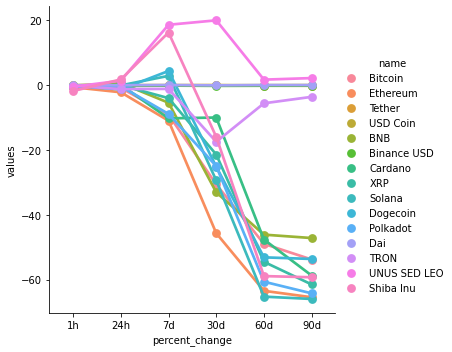

In [120]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')

In [128]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,20304.46451,2022-06-23 14:17:40.863553
